<h1><center>Website Traffic Forecasting</center><h1>

##### Website Traffic Forecasting means forecasting traffic on a website during a particular period. It is one of the best use cases of Time Series Forecasting. 

##### It contains data about daily traffic data from June 2021 to June 2022. 

In [1]:
#let’s get started with the task of website traffic forecasting by importing the necessary Python libraries and the dataset:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [2]:
#I will convert the Date column into Datetime data type:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


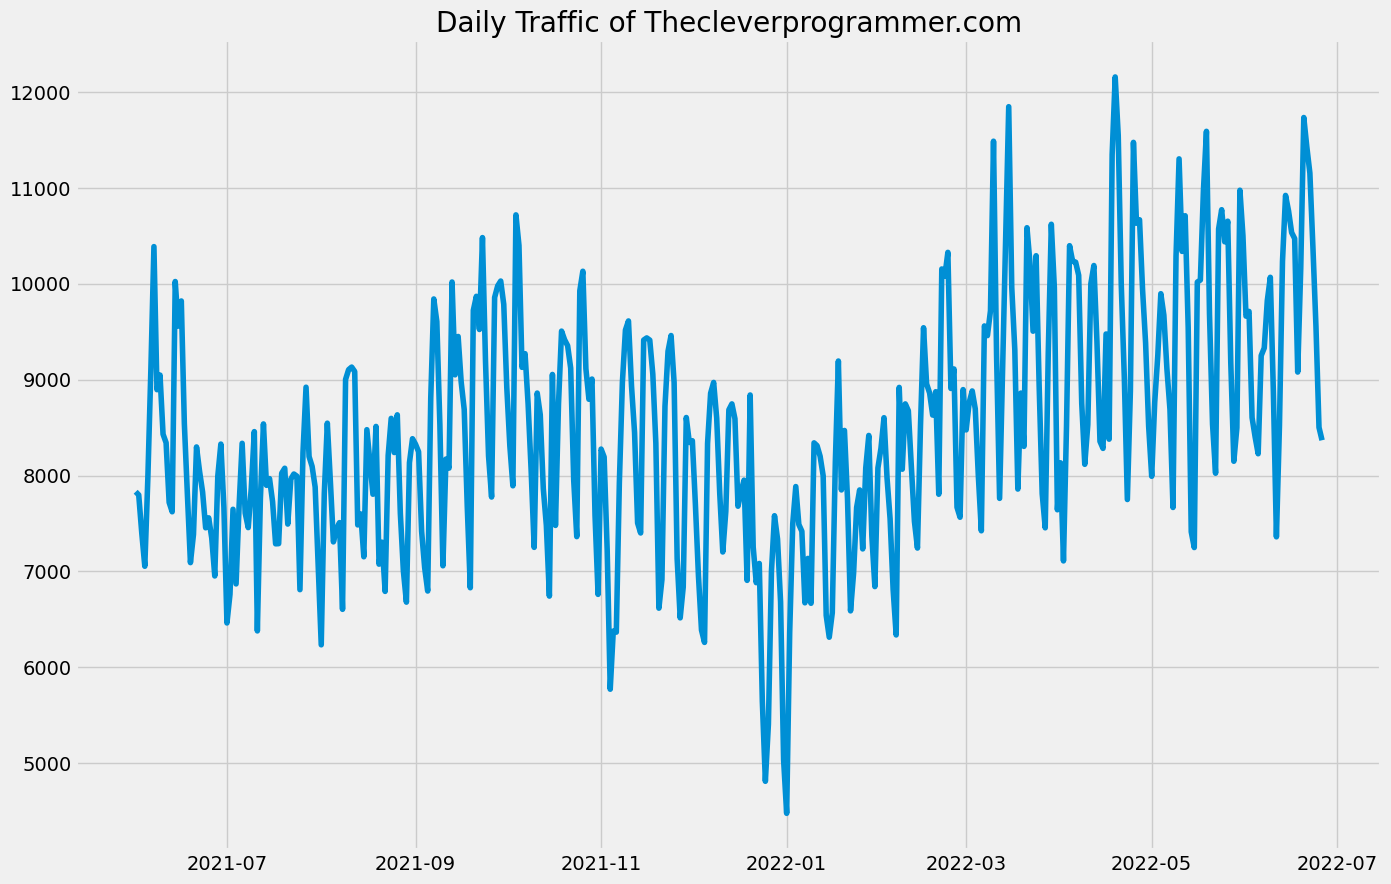

In [3]:
#let’s have a look at the daily traffic of the website:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

###### Data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends.

<Figure size 640x480 with 0 Axes>

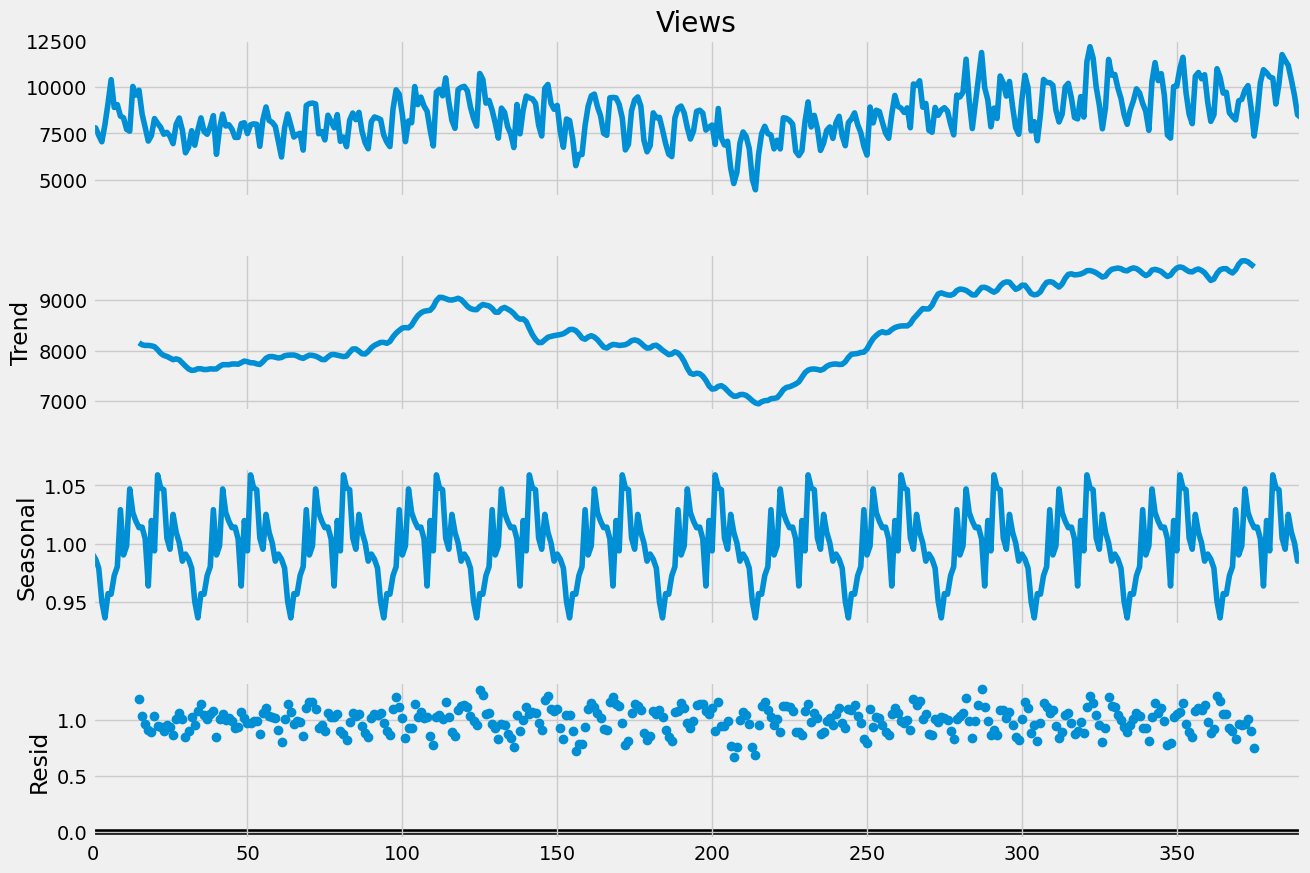

In [6]:
#look at whether our dataset is stationary or seasonal:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Views"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

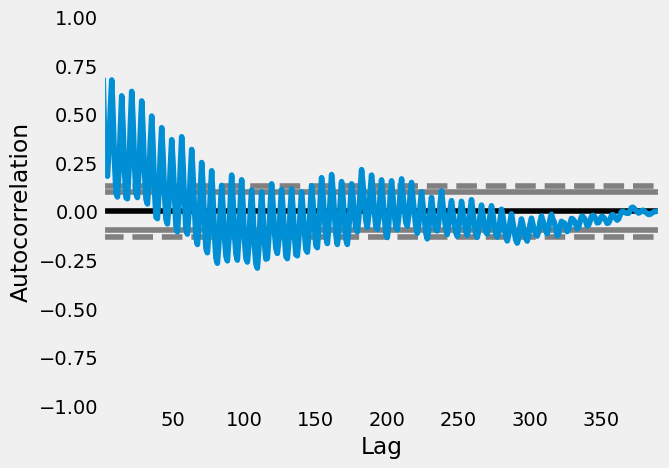

In [7]:
#The values of p and q, we can use the autocorrelation and partial autocorrelation plots:
pd.plotting.autocorrelation_plot(data["Views"])

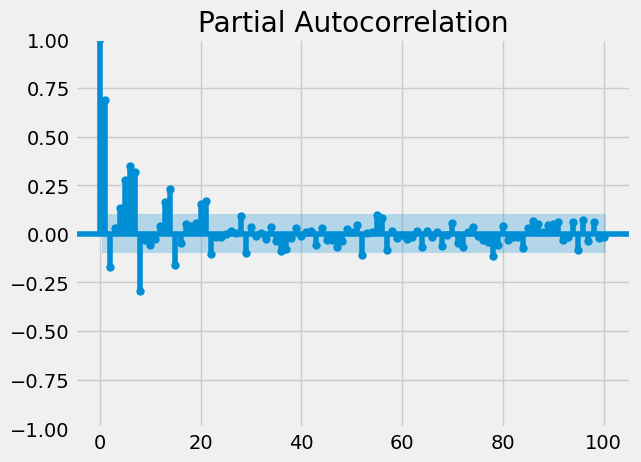

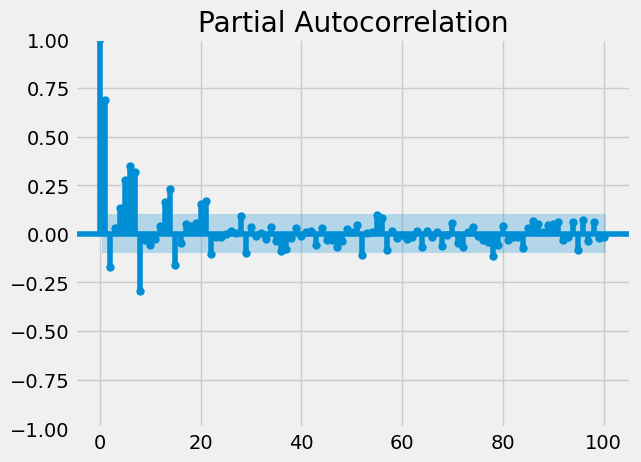

In [8]:
plot_pacf(data["Views"], lags = 100)

In [12]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.430
Date:                            Mon, 10 Jul 2023   AIC                           6228.861
Time:                                    19:27:06   BIC                           6287.884
Sample:                                         0   HQIC                          6252.286
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7804      0.134      5.822      0.000       0.518       1.043
ar.L2         -0.7983      0.135   

In [13]:
#let’s forecast traffic on the website for the next 365 days:
predictions = model.predict(len(data), len(data)+365)
print(predictions)

391     9875.220680
392    10789.302685
393    10758.239498
394     9862.450733
395     8765.353123
           ...     
752    11877.805795
753    11850.544081
754    11674.672866
755    11834.487803
756    11973.865502
Name: predicted_mean, Length: 366, dtype: float64


<Axes: >

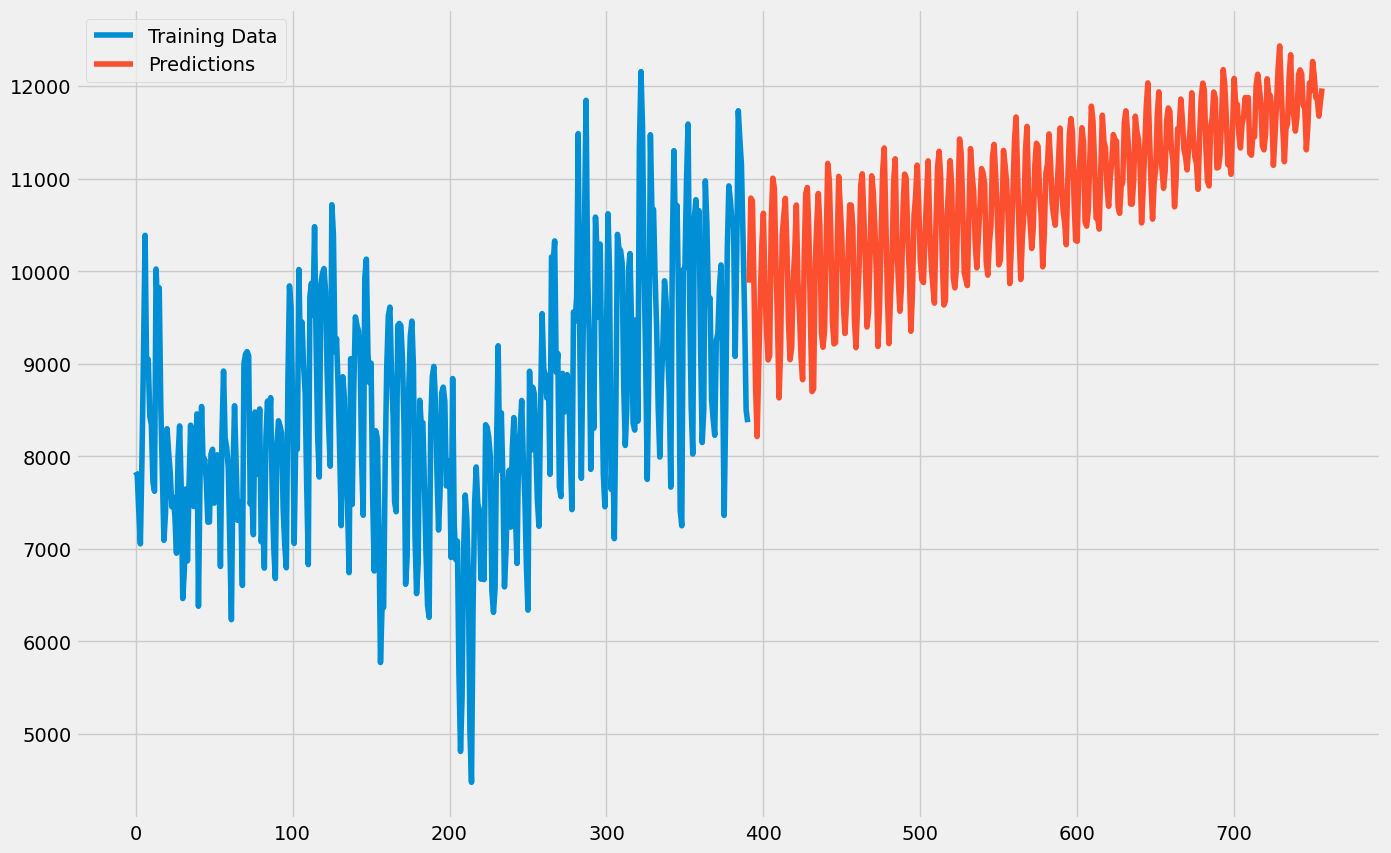

In [14]:
 #plot the predictions:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")